In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load Dataset

In [33]:
# Getting datasets
colors = pd.read_csv("datasets/colors.csv")
inventories = pd.read_csv("datasets/inventories.csv")
inventory_parts = pd.read_csv("datasets/inventory_parts.csv")
inventory_sets = pd.read_csv("datasets/inventory_sets.csv")
part_categories = pd.read_csv("datasets/part_categories.csv")
part_relationships = pd.read_csv("datasets/part_relationships.csv")
parts = pd.read_csv("datasets/parts.csv")
sets = pd.read_csv("datasets/sets.csv")
themes = pd.read_csv("datasets/themes.csv")

# Load Colors

In [34]:
print(colors.head())

   id            name     rgb is_trans
0  -1       [Unknown]  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f


In [35]:
len(colors)

266

In [36]:
colors.groupby("is_trans").count()

,id,name,rgb
is_trans,,,
f,222,222,222
t,44,44,44


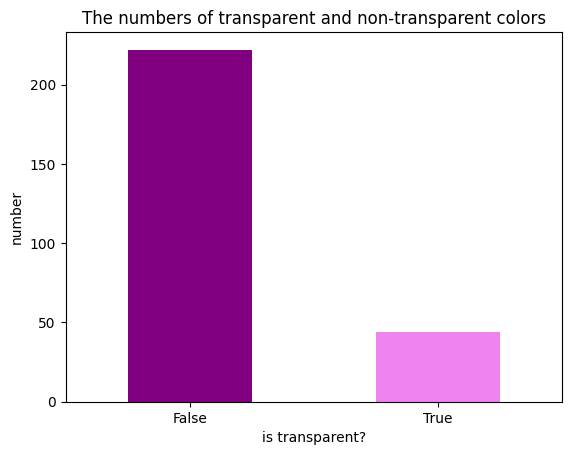

In [37]:
colors.groupby('is_trans')['name'].nunique().plot(kind='bar', color=["purple", "violet"])
plt.title("The numbers of transparent and non-transparent colors")
plt.xlabel("is transparent?")
plt.ylabel("number")
plt.xticks(np.arange(2), ('False', 'True'), rotation=0)
plt.show()

In [38]:
colors['rgb'] = colors['rgb'].apply(lambda x : '#'+x)
colors_rgb = dict(zip(colors.name, colors.rgb))
colors_rgb

{'[Unknown]': '#0033B2',
 'Black': '#05131D',
 'Blue': '#0055BF',
 'Green': '#237841',
 'Dark Turquoise': '#008F9B',
 'Red': '#C91A09',
 'Dark Pink': '#C870A0',
 'Brown': '#583927',
 'Light Gray': '#9BA19D',
 'Dark Gray': '#6D6E5C',
 'Light Blue': '#B4D2E3',
 'Bright Green': '#4B9F4A',
 'Light Turquoise': '#55A5AF',
 'Salmon': '#F2705E',
 'Pink': '#FC97AC',
 'Yellow': '#F2CD37',
 'White': '#FFFFFF',
 'Light Green': '#C2DAB8',
 'Light Yellow': '#FBE696',
 'Tan': '#E4CD9E',
 'Light Violet': '#C9CAE2',
 'Glow In Dark Opaque': '#D4D5C9',
 'Purple': '#81007B',
 'Dark Blue-Violet': '#2032B0',
 'Orange': '#FE8A18',
 'Magenta': '#923978',
 'Lime': '#BBE90B',
 'Dark Tan': '#958A73',
 'Bright Pink': '#E4ADC8',
 'Medium Lavender': '#AC78BA',
 'Lavender': '#E1D5ED',
 'Trans-Black IR Lens': '#635F52',
 'Trans-Dark Blue': '#0020A0',
 'Trans-Green': '#84B68D',
 'Trans-Bright Green': '#D9E4A7',
 'Trans-Red': '#C91A09',
 'Trans-Brown': '#635F52',
 'Trans-Light Blue': '#AEEFEC',
 'Trans-Neon Green': '#F

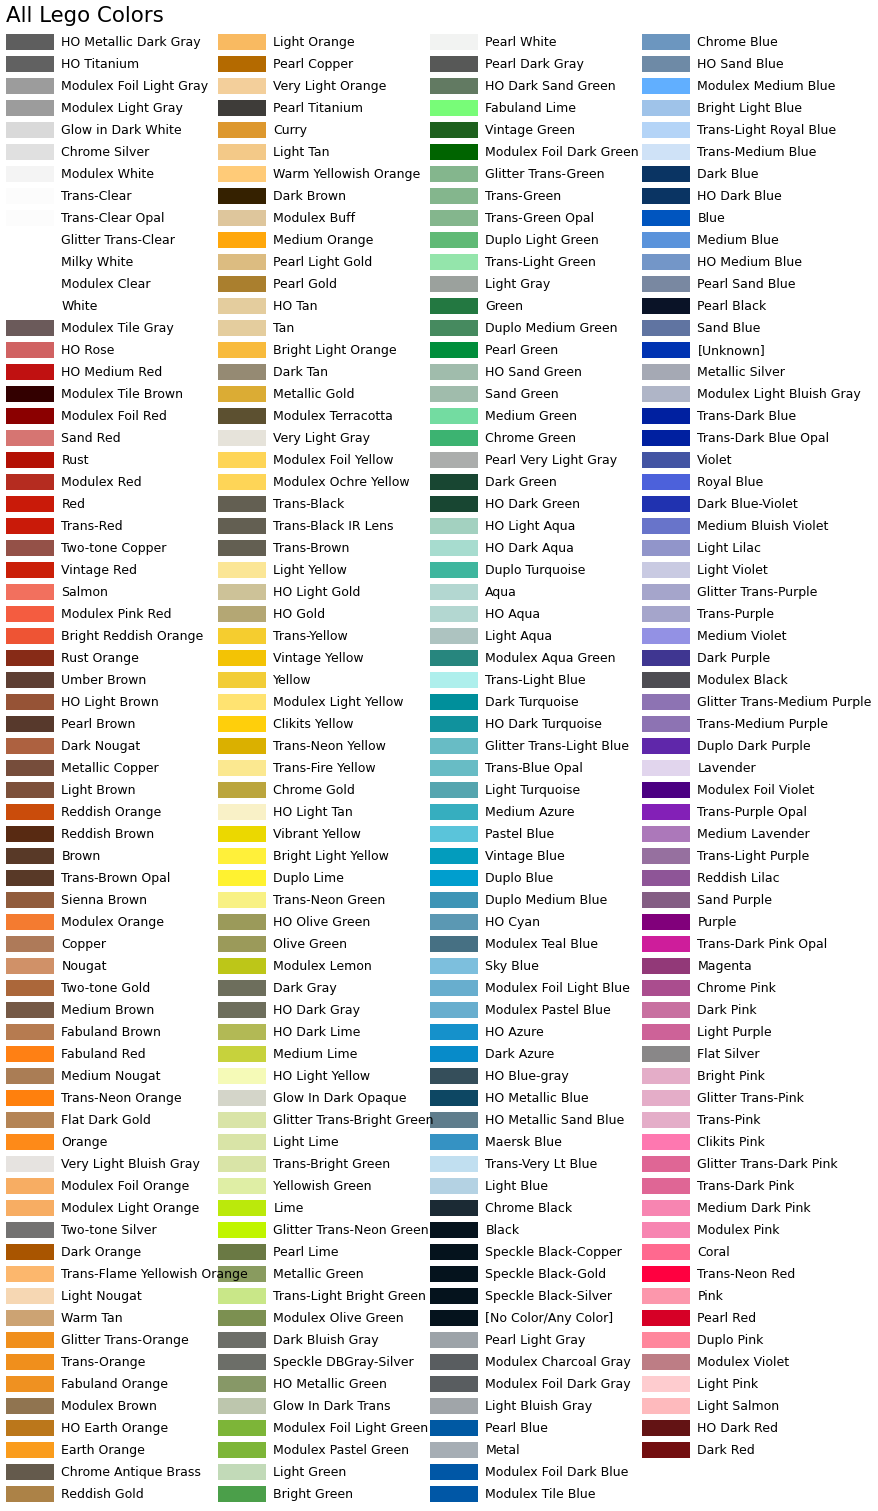

In [39]:
# Making color table
def colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))), name) for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 64

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height, (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        swatch_end_x = cell_width * col + swatch_width
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.hlines(y, swatch_start_x, swatch_end_x,
                  color=colors[name], linewidth=18)

    return fig

colortable(colors_rgb, "All Lego Colors")
plt.show()

ValueError: Invalid RGBA argument: 'copper'

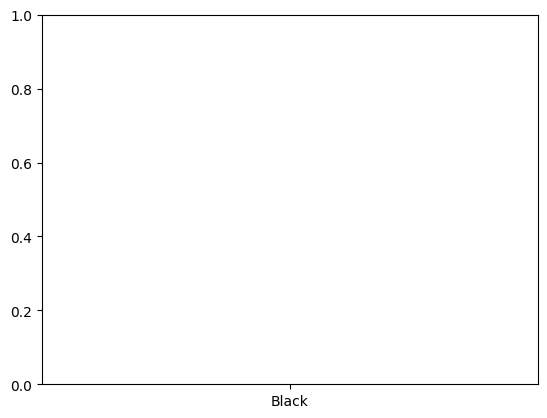

In [40]:
# Grouping main colors
color_names = list(colors_rgb.keys())

main_colors = {}

for color in color_names:
    color = color.replace("-", " ").split()
    if color[-1] in main_colors:
        main_colors[color[-1]] += 1
    else:
        main_colors[color[-1]] = 1


m_colors = {}

for color, num in main_colors.items():
    if int(num) >= 5:
        m_colors[color] = num


plt.bar(list(m_colors.keys()), m_colors.values(), align="center", edgecolor= "gray", color=[color.lower() for color in m_colors.keys()])
plt.xticks(range(len(m_colors)), list(m_colors.keys()), rotation=90)
plt.title("Main Colors of LEGO")
plt.show()

# Load inventories

In [ ]:
print(inventories.head())

In [ ]:
print(inventory_parts.head())

In [ ]:
print(inventory_sets.head())

In [ ]:
print(part_categories.head())

In [ ]:
print(part_relationships.head())

In [ ]:
print(parts.head())

# Load Sets

In [41]:
print(sets.head())

        set_num                         name  year  theme_id  num_parts  \
0  0003977811-1  Ninjago: Book of Adventures  2022       761          1   
1         001-1                        Gears  1965       756         43   
2        0011-2            Town Mini-Figures  1979        67         12   
3        0011-3   Castle 2 for 1 Bonus Offer  1987       199          0   
4        0012-1           Space Mini-Figures  1979       143         12   

                                             img_url  
0  https://cdn.rebrickable.com/media/sets/0003977...  
1   https://cdn.rebrickable.com/media/sets/001-1.jpg  
2  https://cdn.rebrickable.com/media/sets/0011-2.jpg  
3  https://cdn.rebrickable.com/media/sets/0011-3.jpg  
4  https://cdn.rebrickable.com/media/sets/0012-1.jpg  


        set_num                         name  year  theme_id  num_parts  \
0  0003977811-1  Ninjago: Book of Adventures  2022       761          1   
1         001-1                        Gears  1965       756         43   
2        0011-2            Town Mini-Figures  1979        67         12   
3        0011-3   Castle 2 for 1 Bonus Offer  1987       199          0   
4        0012-1           Space Mini-Figures  1979       143         12   

                                             img_url  
0  https://cdn.rebrickable.com/media/sets/0003977...  
1   https://cdn.rebrickable.com/media/sets/001-1.jpg  
2  https://cdn.rebrickable.com/media/sets/0011-2.jpg  
3  https://cdn.rebrickable.com/media/sets/0011-3.jpg  
4  https://cdn.rebrickable.com/media/sets/0012-1.jpg  


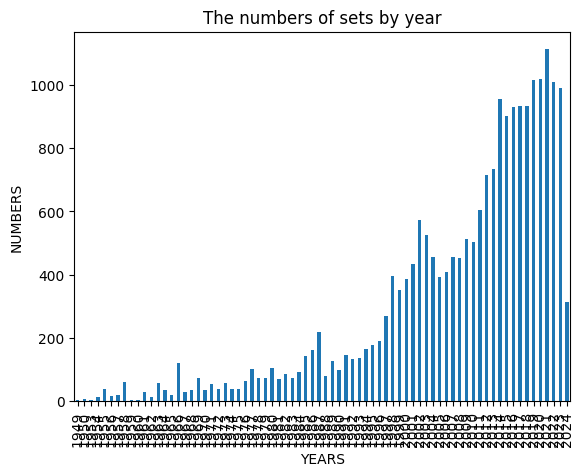

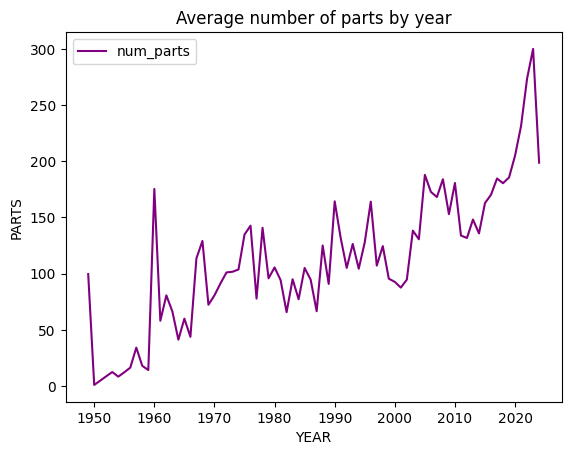

In [42]:
# Getting datasets
sets = pd.read_csv("datasets/sets.csv")
print(sets.head())


# Visualizing numbers of sets by year
sets.groupby('year')['name'].nunique().plot(kind='bar')
plt.title("The numbers of sets by year")
plt.xlabel("YEARS")
plt.ylabel("NUMBERS")
plt.show()


parts_by_year = sets[['year', 'num_parts']].groupby('year', as_index=False).mean()
parts_by_year.plot(x='year', y='num_parts', color="purple")
plt.title("Average number of parts by year")
plt.xlabel("YEAR")
plt.ylabel("PARTS")
plt.show()

In [56]:
# save the set_num in to a file
set_num = sets['set_num']
set_num.to_csv('set_num.csv', index=False)

# Load Themes

In [43]:
print(themes.head())

   id            name  parent_id
0   1         Technic        NaN
1   3     Competition        1.0
2   4  Expert Builder        1.0
3  16      RoboRiders        1.0
4  17  Speed Slammers        1.0


In [49]:
set_themes = sets["theme_id"].value_counts()

In [50]:
set_themes = pd.DataFrame({"id": set_themes.index, "count": set_themes.values})

In [51]:
set_themes = pd.merge(set_themes, themes, on="id")

In [52]:
set_themes_no_parent = set_themes[pd.isnull(set_themes["parent_id"])]

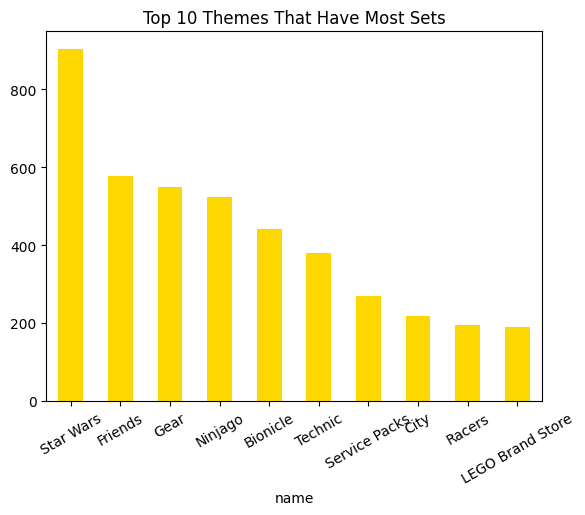

In [53]:
set_themes_top_10 = set_themes_no_parent.sort_values(by=["count"], ascending=False)[:10]
top_10 = set_themes_top_10["count"]
top_10.index = set_themes_top_10["name"]

top_10.plot.bar(color="gold", rot=30)
plt.title("Top 10 Themes That Have Most Sets")
plt.show()